In [69]:
import numpy as np
import pandas as pd
import random
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [70]:
def write_to_submission_file(predicted_labels, out_file, train_num=891,
                    target='Survived', index_label="PassengerId"):
    # turn predictions into data frame and save as csv file
    predicted_df = pd.DataFrame(predicted_labels,
                                index = np.arange(train_num + 1,
                                                  train_num + 1 +
                                                  predicted_labels.shape[0]),
                                columns=[target])
    predicted_df.to_csv(out_file, index_label=index_label)

In [71]:
train_df = pd.read_csv("../../data/titanic_train.csv") 
test_df = pd.read_csv("../../data/titanic_test.csv") 

In [72]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
train_df.shape

(891, 12)

In [74]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [75]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna('S', inplace=True)
test_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)

In [77]:
All = train_df.shape[0]
Surv = train_df[(train_df.Survived == 1)].shape[0]

Surv/All

0.3838383838383838

In [78]:
All

891

In [79]:
Surv

342

In [80]:
All == AllFirstPClass + AllSecondPClass + AllThrPClass

True

In [81]:
FemaleSurv = train_df[(train_df.Survived == 1) & (train_df.Sex != 'male')].shape[0]
MaleSurv = train_df[(train_df.Survived == 1) & (train_df.Sex == 'male')].shape[0]

AllFirstPClass = train_df[(train_df.Pclass == 1)].shape[0]
AllSecondPClass = train_df[(train_df.Pclass == 2)].shape[0]
AllThrPClass = train_df[(train_df.Pclass == 3)].shape[0]

FirstPClassSurv = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1)].shape[0]
SecondPClassSurv = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2)].shape[0]
ThrPClassSurv = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3)].shape[0]

YangSurv = train_df[(train_df.Survived == 1) & (train_df.Age <= 30)].shape[0]
OldSurv = train_df[(train_df.Survived == 1) & (train_df.Age > 30)].shape[0]

YangWoSurv = train_df[(train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoSurv = train_df[(train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]
YangMeSurv = train_df[(train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeSurv = train_df[(train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]

YangWoFi = train_df[(train_df.Pclass == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]

YangMeFi = train_df[(train_df.Pclass == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]

YangWoSe = train_df[(train_df.Pclass == 2) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]

YangMeSe = train_df[(train_df.Pclass == 2) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]

YangWoTh = train_df[(train_df.Pclass == 3) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]

YangMeTh = train_df[(train_df.Pclass == 3) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]


YangWoFiSurv = train_df[(train_df.Pclass == 1) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoFiSurv = train_df[(train_df.Pclass == 1) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]
YangMeFiSurv = train_df[(train_df.Pclass == 1) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeFiSurv = train_df[(train_df.Pclass == 1) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]
YangWoSeSurv = train_df[(train_df.Pclass == 2) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoSeSurv = train_df[(train_df.Pclass == 2) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]
YangMeSeSurv = train_df[(train_df.Pclass == 2) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeSeSurv = train_df[(train_df.Pclass == 2) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]
YangWoThSurv = train_df[(train_df.Pclass == 3) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
OldWoThSurv = train_df[(train_df.Pclass == 3) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')].shape[0]
YangMeThSurv = train_df[(train_df.Pclass == 3) & (train_df.Survived == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
OldMeThSurv = train_df[(train_df.Pclass == 3) & (train_df.Survived == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')].shape[0]


In [82]:
YangWoFi

44

In [83]:
T = (YangWoFi + OldWoFi + YangMeFi + OldMeFi + 
YangWoSe + OldWoSe + YangMeSe + OldMeSe + 
YangWoTh + OldWoTh + YangMeTh + OldMeTh)

T

891

In [84]:
Surv == (YangWoFiSurv + OldWoFiSurv + YangMeFiSurv + OldMeFiSurv + 
YangWoSeSurv + OldWoSeSurv + YangMeSeSurv + OldMeSeSurv + 
YangWoThSurv + OldWoThSurv + YangMeThSurv + OldMeThSurv)

True

In [85]:
Ya1WoFi = train_df[(train_df.Pclass == 1) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
Ya2WoFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
Ya3WoFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
Ya4WoFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
Ya5WoFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

Ya1MeFi = train_df[(train_df.Pclass == 1) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
Ya2MeFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
Ya3MeFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
Ya4MeFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
Ya5MeFi = train_df[(train_df.Pclass == 1) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]

Ya1WoSe = train_df[(train_df.Pclass == 2) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
Ya2WoSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
Ya3WoSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
Ya4WoSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
Ya5WoSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

Ya1MeSe = train_df[(train_df.Pclass == 2) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
Ya2MeSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
Ya3MeSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
Ya4MeSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
Ya5MeSe = train_df[(train_df.Pclass == 2) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]

Ya1WoTh = train_df[(train_df.Pclass == 3) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
Ya2WoTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
Ya3WoTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
Ya4WoTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
Ya5WoTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

Ya1MeTh = train_df[(train_df.Pclass == 3) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
Ya2MeTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
Ya3MeTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
Ya4MeTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
Ya5MeTh = train_df[(train_df.Pclass == 3) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]


In [86]:
All == (Ya1WoFi + Ya1MeFi + Ya1WoSe + Ya1MeSe + Ya1WoTh + Ya1MeTh +
        Ya2WoFi + Ya2MeFi + Ya2WoSe + Ya2MeSe + Ya2WoTh + Ya2MeTh +
        Ya3WoFi + Ya3MeFi + Ya3WoSe + Ya3MeSe + Ya3WoTh + Ya3MeTh +
        Ya4WoFi + Ya4MeFi + Ya4WoSe + Ya4MeSe + Ya4WoTh + Ya4MeTh +
        Ya5WoFi + Ya5MeFi + Ya5WoSe + Ya5MeSe + Ya5WoTh + Ya5MeTh)


True

In [87]:
SurvYa1WoFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
SurvYa2WoFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
SurvYa3WoFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
SurvYa4WoFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
SurvYa5WoFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

SurvYa1MeFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
SurvYa2MeFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
SurvYa3MeFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
SurvYa4MeFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
SurvYa5MeFi = train_df[(train_df.Survived == 1) & (train_df.Pclass == 1) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]

SurvYa1WoSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
SurvYa2WoSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
SurvYa3WoSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
SurvYa4WoSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
SurvYa5WoSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

SurvYa1MeSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
SurvYa2MeSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
SurvYa3MeSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
SurvYa4MeSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
SurvYa5MeSe = train_df[(train_df.Survived == 1) & (train_df.Pclass == 2) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]

SurvYa1WoTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age <= 10) & (train_df.Sex != 'male')].shape[0]
SurvYa2WoTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex != 'male')].shape[0]
SurvYa3WoTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex != 'male')].shape[0]
SurvYa4WoTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex != 'male')].shape[0]
SurvYa5WoTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 40) & (train_df.Sex != 'male')].shape[0]

SurvYa1MeTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age <= 10) & (train_df.Sex == 'male')].shape[0]
SurvYa2MeTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 10) & (train_df.Age <= 20) & (train_df.Sex == 'male')].shape[0]
SurvYa3MeTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 20) & (train_df.Age <= 30) & (train_df.Sex == 'male')].shape[0]
SurvYa4MeTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Age <= 40) & (train_df.Sex == 'male')].shape[0]
SurvYa5MeTh = train_df[(train_df.Survived == 1) & (train_df.Pclass == 3) & (train_df.Age > 40) & (train_df.Sex == 'male')].shape[0]


In [88]:
Surv == (SurvYa1WoFi + SurvYa1MeFi + SurvYa1WoSe + SurvYa1MeSe + SurvYa1WoTh + SurvYa1MeTh +
        SurvYa2WoFi + SurvYa2MeFi + SurvYa2WoSe + SurvYa2MeSe + SurvYa2WoTh + SurvYa2MeTh +
        SurvYa3WoFi + SurvYa3MeFi + SurvYa3WoSe + SurvYa3MeSe + SurvYa3WoTh + SurvYa3MeTh +
        SurvYa4WoFi + SurvYa4MeFi + SurvYa4WoSe + SurvYa4MeSe + SurvYa4WoTh + SurvYa4MeTh +
        SurvYa5WoFi + SurvYa5MeFi + SurvYa5WoSe + SurvYa5MeSe + SurvYa5WoTh + SurvYa5MeTh)

True

In [89]:
All

891

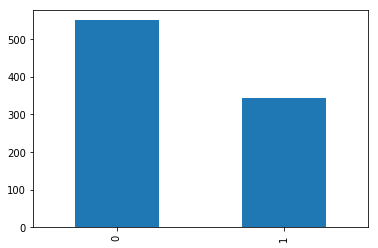

In [90]:
train_df['Survived'].value_counts().plot(kind='bar',label='Survived')

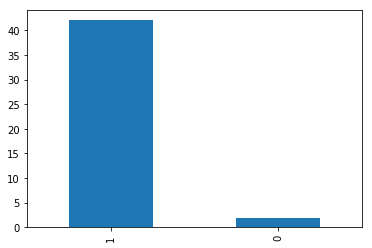

In [91]:
YangWoFi_df = train_df[(train_df.Pclass == 1) & (train_df.Age <= 30) & (train_df.Sex != 'male')]
OldWoFi_df = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Sex != 'male')]
YangMeFi_df = train_df[(train_df.Pclass == 1) & (train_df.Age <= 30) & (train_df.Sex == 'male')]
OldMeFi_df = train_df[(train_df.Pclass == 1) & (train_df.Age > 30) & (train_df.Sex == 'male')]
YangWoSe_df = train_df[(train_df.Pclass == 2) & (train_df.Age <= 30) & (train_df.Sex != 'male')]
OldWoSe_df = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Sex != 'male')]
YangMeSe_df = train_df[(train_df.Pclass == 2) & (train_df.Age <= 30) & (train_df.Sex == 'male')]
OldMeSe_df = train_df[(train_df.Pclass == 2) & (train_df.Age > 30) & (train_df.Sex == 'male')]
YangWoTh_df = train_df[(train_df.Pclass == 3) & (train_df.Age <= 30) & (train_df.Sex != 'male')]
OldWoTh_df = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Sex != 'male')]
YangMeTh_df = train_df[(train_df.Pclass == 3) & (train_df.Age <= 30) & (train_df.Sex == 'male')]
OldMeTh_df = train_df[(train_df.Pclass == 3) & (train_df.Age > 30) & (train_df.Sex == 'male')]

YangWoFi_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldWoFi_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#YangMeFi_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldMeFi_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#YangWoSe_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldWoSe_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#YangMeSe_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldMeSe_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#YangWoTh_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldWoTh_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#YangMeTh_df['Survived'].value_counts().plot(kind='bar',label='Survived')
#OldMeTh_df['Survived'].value_counts().plot(kind='bar',label='Survived')

In [92]:
Surv == (YangWoFiSurv + OldWoFiSurv + YangMeFiSurv + OldMeFiSurv + 
YangWoSeSurv + OldWoSeSurv + YangMeSeSurv + OldMeSeSurv + 
YangWoThSurv + OldWoThSurv + YangMeThSurv + OldMeThSurv)

True

In [93]:
All == (YangWoFi + OldWoFi + YangMeFi + OldMeFi + 
YangWoSe + OldWoSe + YangMeSe + OldMeSe + 
YangWoTh + OldWoTh + YangMeTh + OldMeTh)

True

In [94]:
Surv/All

0.3838383838383838

In [95]:
def prognoz(a=0.383838383838):
    k = random.random()
    if a > k:
        #print("survived")
        return 1
    else:
        #print("not survived")
        return 0
    pass

In [96]:
test_df['PSurv'] = Surv/All

In [97]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PSurv
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.383838
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.383838
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.383838
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.383838
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.383838


##### Выделяем 30 групп

In [155]:
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age <= 10) & (test_df.Sex != 'male')] = SurvYa1WoFi/Ya1WoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex != 'male')] = SurvYa2WoFi/Ya2WoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = SurvYa3WoFi/Ya3WoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex != 'male')] = SurvYa4WoFi/Ya4WoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 40) & (test_df.Sex != 'male')] = Ya5WoFi/Ya5WoFi

test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age <= 10) & (test_df.Sex == 'male')] = Ya1MeFi/Ya1MeFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex == 'male')] = SurvYa2MeFi/Ya2MeFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = SurvYa3MeFi/Ya3MeFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex == 'male')] = SurvYa4MeFi/Ya4MeFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 40) & (test_df.Sex == 'male')] = SurvYa5MeFi/Ya5MeFi

test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age <= 10) & (test_df.Sex != 'male')] = SurvYa1WoSe/Ya1WoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex != 'male')] = SurvYa2WoSe/Ya2WoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = SurvYa3WoSe/Ya3WoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex != 'male')] = SurvYa4WoSe/Ya4WoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 40) & (test_df.Sex != 'male')] = SurvYa5WoSe/Ya5WoSe

test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age <= 10) & (test_df.Sex == 'male')] = SurvYa1MeSe/Ya1MeSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex == 'male')] = SurvYa2MeSe/Ya2MeSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = SurvYa3MeSe/Ya3MeSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex == 'male')] = Ya4MeSe/Ya4MeSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 40) & (test_df.Sex == 'male')] = SurvYa5MeSe/Ya5MeSe

test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age <= 10) & (test_df.Sex != 'male')] = SurvYa1WoTh/Ya1WoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex != 'male')] = SurvYa2WoTh/Ya2WoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = SurvYa3WoTh/Ya3WoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex != 'male')] = SurvYa4WoTh/Ya4WoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 40) & (test_df.Sex != 'male')] = SurvYa5WoTh/Ya5WoTh

test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age <= 10) & (test_df.Sex == 'male')] = SurvYa1MeTh/Ya1MeTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 10) & (test_df.Age <= 20) & (test_df.Sex == 'male')] = SurvYa2MeTh/Ya2MeTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 20) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = SurvYa3MeTh/Ya3MeTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 30) & (test_df.Age <= 40) & (test_df.Sex == 'male')] = SurvYa4MeTh/Ya4MeTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 40) & (test_df.Sex == 'male')] = SurvYa5MeTh/Ya5MeTh


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

In [45]:
SurvYa5WoTh/Ya5WoTh

0.1111111111111111

##### Выделяем 12 групп 

In [131]:
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = YangWoFiSurv/YangWoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 30) & (test_df.Sex != 'male')] = OldWoFiSurv/OldWoFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = YangMeFiSurv/YangMeFi
test_df.PSurv[(test_df.Pclass == 1) & (test_df.Age > 30) & (test_df.Sex == 'male')] = OldMeFiSurv/OldMeFi
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = YangWoSeSurv/YangWoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 30) & (test_df.Sex != 'male')] = OldWoSeSurv/OldWoSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = YangMeSeSurv/YangMeSe
test_df.PSurv[(test_df.Pclass == 2) & (test_df.Age > 30) & (test_df.Sex == 'male')] = OldMeSeSurv/OldMeSe
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age <= 30) & (test_df.Sex != 'male')] = YangWoThSurv/YangWoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 30) & (test_df.Sex != 'male')] = OldWoThSurv/OldWoTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age <= 30) & (test_df.Sex == 'male')] = YangMeThSurv/YangMeTh
test_df.PSurv[(test_df.Pclass == 3) & (test_df.Age > 30) & (test_df.Sex == 'male')] = OldMeThSurv/OldMeTh

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

In [99]:
test_df.head(22)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PSurv
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.142857
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.111111
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.095238
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.120419
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.554054
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.129630
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0.554054
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0.047619
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0.520000
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0.120419


In [117]:
l = test_df.shape[0]
l

418

In [118]:
test_df['Survived'] = 0

In [141]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PSurv,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.112500,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.304348,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.106383,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.142322,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.537190,1


In [156]:

for i in range(l):
    test_df.Survived[i] = prognoz(test_df.PSurv[i])
    
test_df.head(25)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PSurv,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.142857,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.111111,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.095238,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.120419,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.554054,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0.129630,1
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0.554054,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0.047619,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0.520000,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0.120419,0


In [157]:
p = 0
for i in range(l):
    p = p + test_df.Survived[i] 
    
#los = p - l*Surv/All
#los
p

186

In [158]:
round(l*Surv/All)

160

In [159]:
otvet_df = test_df[['PassengerId', 'Survived']].set_index('PassengerId')
#otvet_df.set_index('PassengerId')
#del otvet_df['1']
otvet_df.head()

,Survived
PassengerId,
892,0
893,0
894,1
895,0
896,1


In [160]:
otvet_df.to_csv("otvet4.csv") 